<a href="https://colab.research.google.com/github/Naiomeap/Trabalho-em-Grupo-Sa-de/blob/main/Trabalho_em_Grupo_Analise_Saude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importando as Bibliotecas

In [ ]:

import pandas as pd
import numpy as np
import sklearn # scikit-learn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # Revert to matplotlib defaults
plt.rcParams['figure.figsize'] = (17, 12 )
plt.rcParams['axes.labelpad'] = 10
sns.set_style("darkgrid")
# sns.set_context("poster", font_scale=1.0)
np.random.seed(42)  # Define a semente para reprodução dos dados aleatórios
data = np.random.normal(size=1000)  # Cria um array com 1000 valores aleatórios com distribuição normal
q1 = np.percentile(data, 25)  # Primeiro quartil
q3 = np.percentile(data, 75)  # Terceiro quartil
iqr = q3 - q1  # Amplitude interquartil (IQR)
upper_limit = q3 + 1.5 * iqr  # Limite superior
lower_limit = q1 - 1.5 * iqr  # Limite inferior


In [ ]:
df = pd.read_csv('/content/Tabela_Compilada.csv', encoding='utf-8')

A Tabela_Compilada.csv contém dados de todos os munícipios em relação as profissiões escolhidas da área da saúde, assim como alguns dados demográficos.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CD_MUN      5570 non-null   int64  
 1   MUN         5570 non-null   object 
 2   AR_TER_km2  5570 non-null   float64
 3   POP_EST     5570 non-null   int64  
 4   DENS_DEM    5570 non-null   float64
 5   ESC         5570 non-null   float64
 6   IDHM        5570 non-null   float64
 7   MORT_INF    5570 non-null   float64
 8   PIB_P_CAP   5570 non-null   float64
 9   MD_CIR_G    5570 non-null   float64
 10  MD_CLIN     5570 non-null   float64
 11  MD_GIN_OBS  5570 non-null   float64
 12  MD_FAM      5570 non-null   float64
 13  MD_PED      5570 non-null   float64
 14  MD_GERI     5570 non-null   float64
 15  MD_URO      5570 non-null   float64
 16  AS_SOC      5570 non-null   float64
 17  ENF         5570 non-null   float64
 18  FISIO       5570 non-null   float64
 19  FONO        5570 non-null  

O dataframe não possui dados nulos e os tipos de dados são todos númericos, exceto o nome dos munícipios.

In [ ]:
df

,CD_MUN,MUN,AR_TER_km2,POP_EST,DENS_DEM,ESC,IDHM,MORT_INF,PIB_P_CAP,MD_CIR_G,MD_CLIN,MD_GIN_OBS,MD_FAM,MD_PED,MD_GERI,MD_URO,AS_SOC,ENF,FISIO,FONO,NUTRI,ODONTO,PSICO,PSIQ,POSTO,CS_UBS,POLICL,HOSP_GER,HOSP_ESP,PRT_SOC,PRT_ESP
0,1100015,Alta Floresta D'Oeste,7067.13,22516,3.45,95.70,641.00,8.17,21552.47,1.00,11.00,0.00,0.00,0.00,0.00,0.00,4.00,20.00,3.00,0.00,3.00,7.00,1.00,1.00,6.00,4.00,0.00,2.00,0.00,0.00,0.00
1,1100023,Ariquemes,4426.57,111148,20.41,97.20,702.00,10.41,23206.36,7.00,96.00,16.00,0.00,15.00,0.00,2.00,7.00,112.00,50.00,5.00,8.00,12.00,25.00,1.00,0.00,13.00,1.00,10.00,1.00,0.00,0.00
2,1100031,Cabixi,1314.35,5067,4.80,98.10,0.65,25.00,25837.12,0.00,6.00,0.00,0.00,0.00,0.00,0.00,1.00,6.00,2.00,1.00,1.00,1.00,1.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00
3,1100049,Cacoal,3793.00,86416,20.72,97.60,718.00,5.09,25708.96,6.00,109.00,15.00,2.00,24.00,0.00,2.00,23.00,285.00,90.00,11.00,20.00,128.00,45.00,6.00,1.00,11.00,5.00,8.00,0.00,1.00,0.00
4,1100056,Cerejeiras,2783.30,16088,6.12,98.50,692.00,16.88,28714.35,0.00,10.00,0.00,0.00,1.00,0.00,0.00,2.00,12.00,5.00,0.00,0.00,8.00,2.00,0.00,2.00,4.00,0.00,1.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,5222005,Vianópolis,954284.00,14088,13.15,98.60,712.00,5.10,32025.46,0.00,5.00,1.00,0.00,0.00,0.00,0.00,0.00,7.00,4.00,2.00,4.00,2.00,4.00,0.00,0.00,5.00,0.00,1.00,0.00,0.00,0.00
5566,5222054,Vicentinópolis,737255.00,9002,10.00,99.10,684.00,26.79,37435.76,0.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,4.00,0.00,0.00,1.00,1.00,0.00,0.00,5.00,0.00,1.00,0.00,0.00,0.00
5567,5222203,Vila Boa,1060.17,6451,4.47,96.00,647.00,20.00,17160.33,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,4.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,2.00,0.00,1.00,0.00,0.00,0.00
5568,5222302,Vila Propício,2181.58,5941,2.36,96.90,634.00,56.34,28444.32,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,2.00,0.00,1.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00


O dataframe nos apresenta 5570 linhas correspondente a quantidade de munícipios brasileiros, distribuída em 31 variáveis.

In [ ]:
pd.set_option('float_format', '{:.2f}'.format)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CD_MUN,5570.00,3253590.77,984910.34,1100015.00,2512125.75,3146280.00,4119189.50,5300108.00
AR_TER_km2,5570.00,242470.20,258410.74,26.10,3715.94,170743.00,379095.00,999517.00
POP_EST,5570.00,38297.60,224288.15,771.00,5454.00,11732.00,25764.75,12396372.00
DENS_DEM,5570.00,108.25,571.86,0.13,11.57,24.40,51.84,13024.56
ESC,5570.00,97.14,2.66,51.80,96.60,97.60,98.50,100.00
IDHM,5570.00,591.77,210.38,0.45,579.00,651.00,712.00,862.00
MORT_INF,5570.00,19.03,10.86,1.96,11.24,18.09,24.36,181.82
PIB_P_CAP,5570.00,23513.94,24238.46,4788.18,9880.37,17433.84,28729.91,583171.85
MD_CIR_G,5570.00,1.83,20.49,0.00,0.00,0.00,0.00,1067.00
MD_CLIN,5570.00,25.86,187.25,0.00,1.00,3.00,10.00,9833.00


In [ ]:
#df.iloc[:, 2]


In [ ]:
#df[i]

In [ ]:
# #import seaborn as sns

# df_cols = ['IDHM', 'PIB_P_CAP', # a cauda da distribuicao está muito pesada, significa que pib percapita alta e natural para muitos municipios do br
#            'MD_CIR_G', 'MD_CLIN', 'MD_GIN_OBS', 'MD_FAM', 
#       'MD_PED', 'MD_GERI', 'MD_URO', 'AS_SOC', 'ENF', 'FISIO', 'FONO', 'NUTRI', 'ODONTO', 'PSICO', 'PSIQ', 
#      'CS_UBS', 'POLICL', 'HOSP_GER']

# f, axes = plt.subplots(len(df_cols), 1)
# k = 0
# for i in df_cols:
#   sns.boxplot(data=df[i],  orient='h' , ax=axes[k])
#   k += 1

Aqui foi feita a escolha de que todos os dados númericos representado como float apresentarão 2 casas decimais.

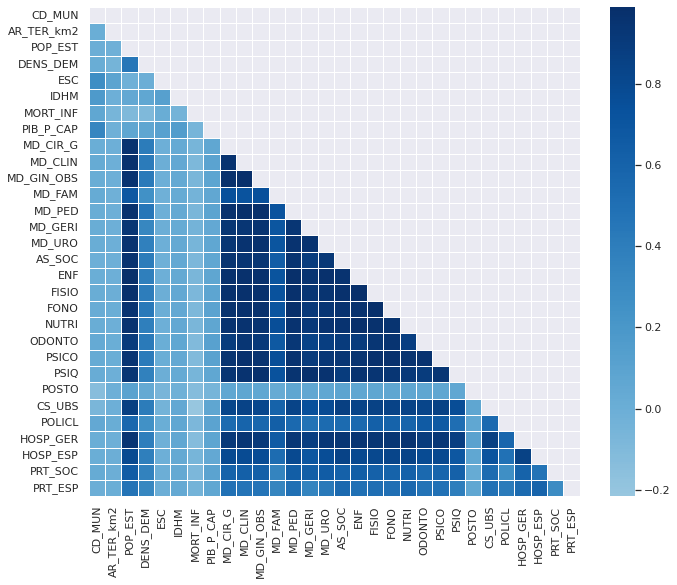

In [ ]:
# computando a matrix de correlação das variaveis (todas por todas)
corr = df.corr()

# retirando o triangulo superior da matrix (ele é espelhado a parte inferior)
mask = np.triu(np.ones_like(corr, dtype= bool))
f, ax = plt.subplots(figsize=(11, 9))

# gerando a matrix
sns.heatmap(corr, mask= mask, center= 0, linewidth= 0.5, cmap='Blues');

Gráfico de Pearson que correlaciona as variáveis umas com as outras, sendo que as correlações mais altas estão com cores mais escuras e as mais baixas com cores mais claras. Foi retirado a parte superior direita do gráfico para uma melhor visualização. Sendo que a POP_EST foi o que maior se correlacionou com a quantidade de profissionais da área da saúde.


In [ ]:
cols=['CD_MUN', 'MUN',  'POP_EST', 'MD_CIR_G', 'MD_CLIN', 'MD_GIN_OBS', 'MD_FAM', 
      'MD_PED', 'MD_GERI', 'MD_URO', 'AS_SOC', 'ENF', 'FISIO', 'FONO', 'NUTRI', 'ODONTO', 'PSICO', 'PSIQ', 
     'CS_UBS', 'POLICL', 'HOSP_GER', 'HOSP_ESP',
      'PRT_SOC', 'PRT_ESP']

pop_est=['CD_MUN', 'MUN',  'POP_EST', 'MD_CIR_G', 'MD_CLIN', 'MD_GIN_OBS', 'MD_FAM', 
      'MD_PED', 'MD_GERI', 'MD_URO', 'AS_SOC', 'ENF', 'FISIO', 'FONO', 'NUTRI', 'ODONTO', 'PSICO', 'PSIQ', 
     'CS_UBS', 'POLICL', 'HOSP_GER', 'HOSP_ESP',
      'PRT_SOC', 'PRT_ESP']

Foi feita um lista das colunas que mais estão correlacionadas (maior ou = 0.5)

Foi Criando um novo data frame para feature engineering para criar colunas novas

In [ ]:
# Primeira linha é para olhar todas as colunas que existe no data frame
pd.set_option('display.max_columns', None) 
# Estatisticas Básicas
df.describe()

,CD_MUN,AR_TER_km2,POP_EST,DENS_DEM,ESC,IDHM,MORT_INF,PIB_P_CAP,MD_CIR_G,MD_CLIN,MD_GIN_OBS,MD_FAM,MD_PED,MD_GERI,MD_URO,AS_SOC,ENF,FISIO,FONO,NUTRI,ODONTO,PSICO,PSIQ,POSTO,CS_UBS,POLICL,HOSP_GER,HOSP_ESP,PRT_SOC,PRT_ESP
count,5570.00,5570.00,5570.00,5570.00,5570.00,5570.00,5570.00,5570.00,5570.00,5570.00,5570.00,5570.00,5570.00,5570.00,5570.00,5570.00,5570.00,5570.00,5570.00,5570.00,5570.00,5570.00,5570.00,5570.00,5570.00,5570.00,5570.00,5570.00,5570.00,5570.00
mean,3253590.77,242470.20,38297.60,108.25,97.14,591.77,19.03,23513.94,1.83,25.86,4.19,0.19,7.45,0.17,0.46,6.81,49.07,17.92,4.47,6.65,16.08,13.48,1.70,1.58,7.10,1.88,0.97,0.18,0.05,0.01
std,984910.34,258410.74,224288.15,571.86,2.66,210.38,10.86,24238.46,20.49,187.25,43.66,2.86,69.97,2.94,5.78,46.04,457.63,129.45,32.19,52.32,97.45,85.03,20.26,3.12,13.37,14.96,3.42,1.96,0.36,0.17
min,1100015.00,26.10,771.00,0.13,51.80,0.45,1.96,4788.18,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2512125.75,3715.94,5454.00,11.57,96.60,579.00,11.24,9880.37,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,3.00,2.00,0.00,1.00,1.00,1.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00
50%,3146280.00,170743.00,11732.00,24.40,97.60,651.00,18.09,17433.84,0.00,3.00,0.00,0.00,0.00,0.00,0.00,1.00,7.00,3.00,1.00,1.00,2.00,2.00,0.00,0.00,4.00,0.00,1.00,0.00,0.00,0.00
75%,4119189.50,379095.00,25764.75,51.84,98.50,712.00,24.36,28729.91,0.00,10.00,1.00,0.00,1.00,0.00,0.00,3.00,17.00,8.00,2.00,3.00,7.00,6.00,1.00,2.00,8.00,1.00,1.00,0.00,0.00,0.00
max,5300108.00,999517.00,12396372.00,13024.56,100.00,862.00,181.82,583171.85,1067.00,9833.00,2355.00,142.00,3550.00,185.00,325.00,2302.00,25044.00,6874.00,1593.00,2484.00,4384.00,4102.00,1200.00,78.00,522.00,581.00,157.00,69.00,15.00,6.00


In [ ]:
# feature Engineering = trocamos os valores absoluto das linhas por intervalos para facilitar a visualização
df['PSICO'] = pd.cut(df['PSICO'], bins=[0,5,10,50,100,500,5000], labels=False)
df['ODONTO'] = pd.cut(df['ODONTO'], bins=[0,5,10,50,100,500,5000], labels=False)
df['MD_CIR_G'] = pd.cut(df['MD_CIR_G'], bins=[0,5,10,50,100,500,5000], labels=False)
df['MD_GIN_OBS'] = pd.cut(df['MD_GIN_OBS'], bins=[0,5,10,50,100,500,5000], labels=False)
df['MD_FAM'] = pd.cut(df['MD_FAM'], bins=[0,5,10,50,100,500,5000], labels=False)
df['MD_PED'] = pd.cut(df['MD_PED'], bins=[0,5,10,50,100,500,5000], labels=False)
df['MD_GERI'] = pd.cut(df['MD_GERI'], bins=[0,5,10,50,100,500,5000], labels=False)
df['MD_URO'] = pd.cut(df['MD_URO'], bins=[0,5,10,50,100,500,5000], labels=False)
df['AS_SOC'] = pd.cut(df['AS_SOC'], bins=[0,5,10,50,100,500,5000], labels=False)
df['FONO'] = pd.cut(df['FONO'], bins=[0,5,10,50,100,500,5000], labels=False)
df['NUTRI'] = pd.cut(df['NUTRI'], bins=[0,5,10,50,100,500,5000], labels=False)
df['PSIQ'] = pd.cut(df['PSIQ'], bins=[0,5,10,50,100,500,5000], labels=False)
df['FISIO'] = pd.cut(df['FISIO'], bins=[0,5,10,50,100,500,5000,6000,7000], labels=False)
df['ENF'] = pd.cut(df['ENF'], bins=[0,5,10,50,100,500,5000,10000,15000,20000,30000], labels=False)
df['POP_EST'] = pd.cut(df['POP_EST'], bins=[0,5000,10000,50000,100000,200000,500000,1000000,15000000], labels=False)

Foi realizado a troca dos valores absoluto das linhas por intervalos para facilitar a visualização

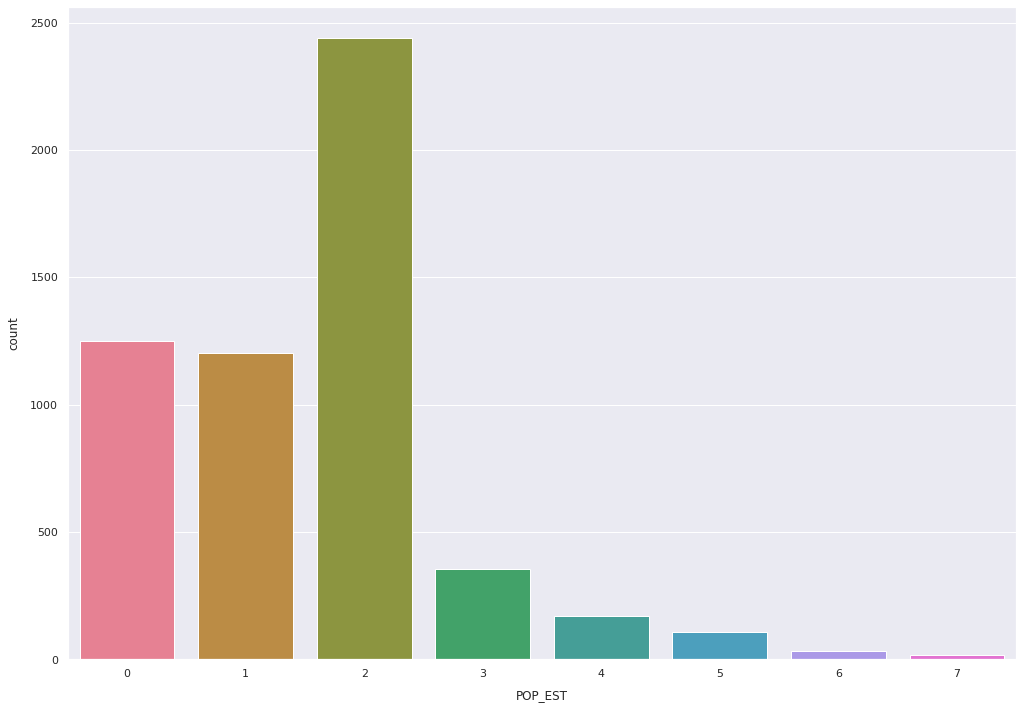

In [ ]:
sns.countplot(data=df,x='POP_EST', palette='husl');

O gráfico apresenta as quantidades de cidades com cada intervalo de população. Nos proximos gráficos será feito a quantidade de
especialistas que o SUS oferece versus a estimativa da população.

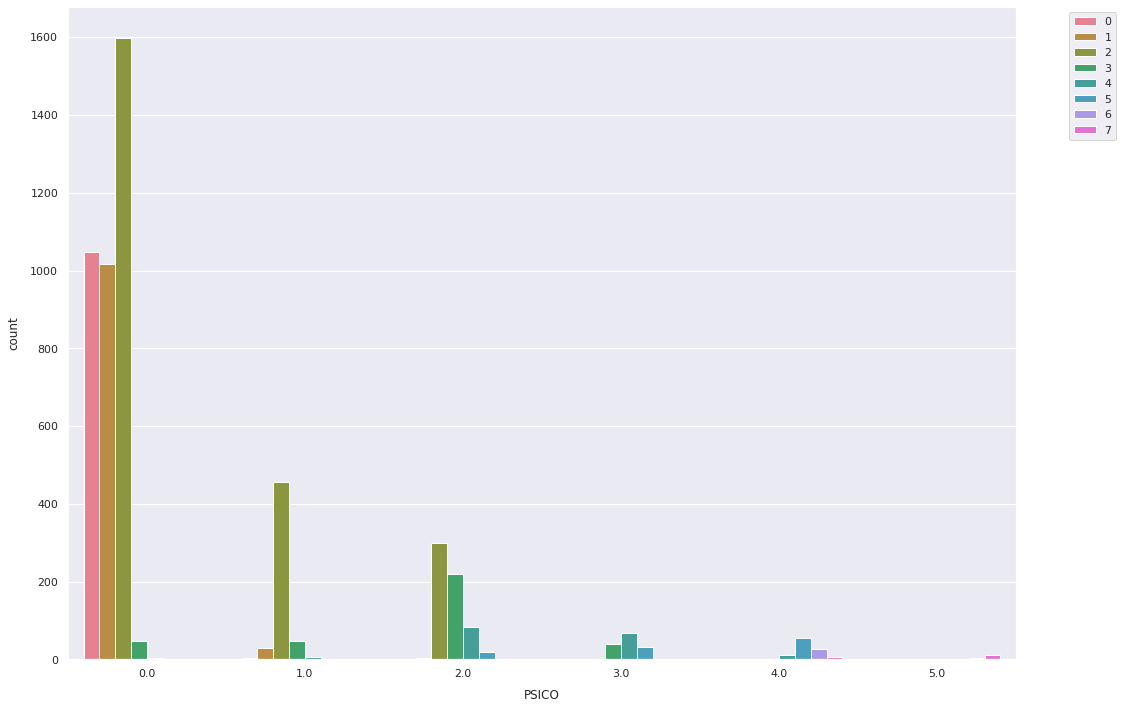

In [ ]:
ax=sns.countplot(data=df,x='PSICO', hue='POP_EST', palette='husl');
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

A maioria dos municipios tem até 10 psicologos na cidade, quanto menor a estimativa da população menor a quantidade de psicologos.

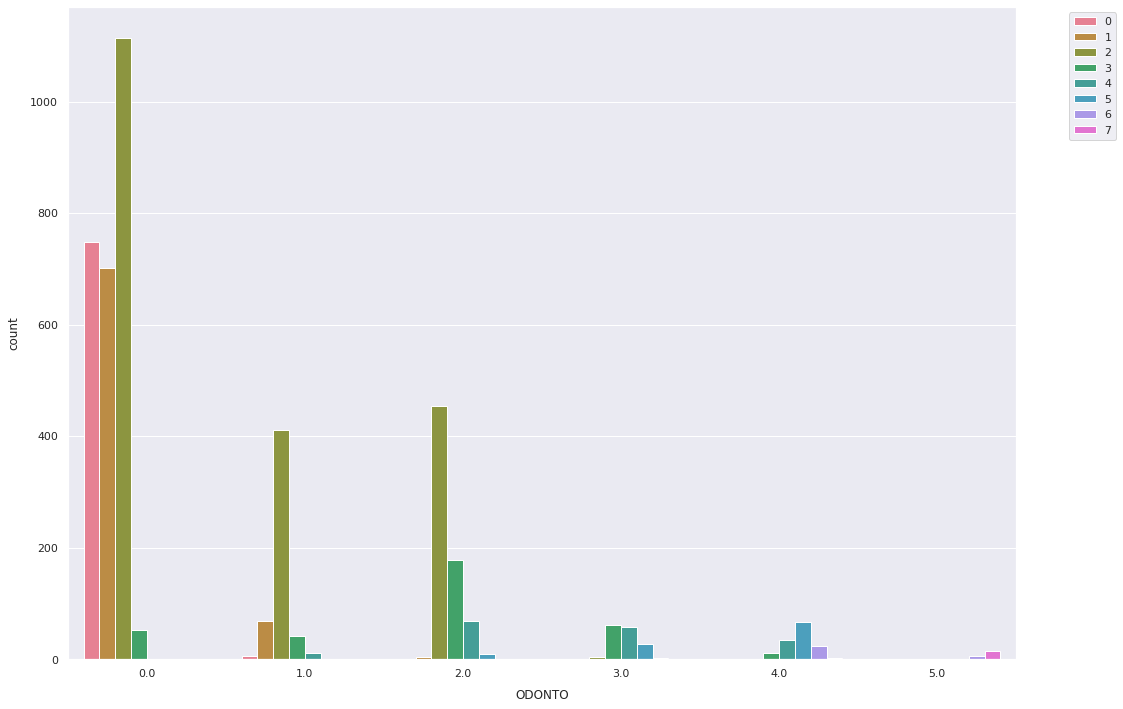

In [ ]:
ax=sns.countplot(data=df,x='ODONTO', hue='POP_EST', palette='husl');
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

A maioria dos municipios tem até 5 dentistas na cidade, quanto menor a estimativa da população menor a quantidade de dentistas.

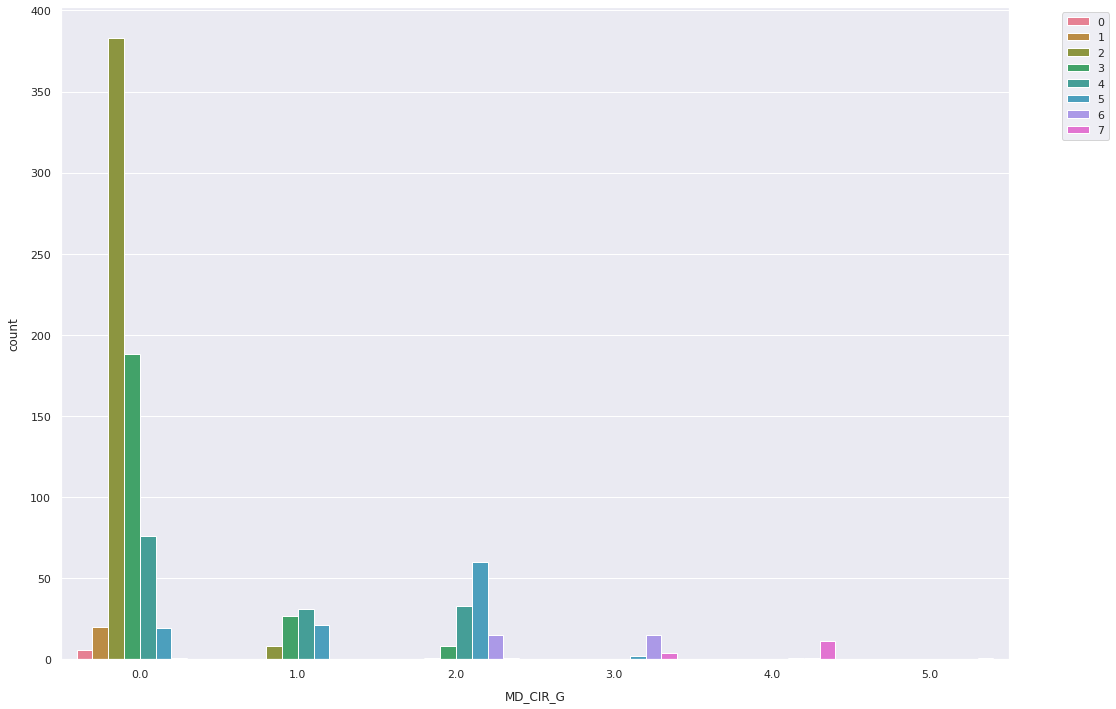

In [ ]:
ax=sns.countplot(data=df,x='MD_CIR_G', hue='POP_EST', palette='husl');
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

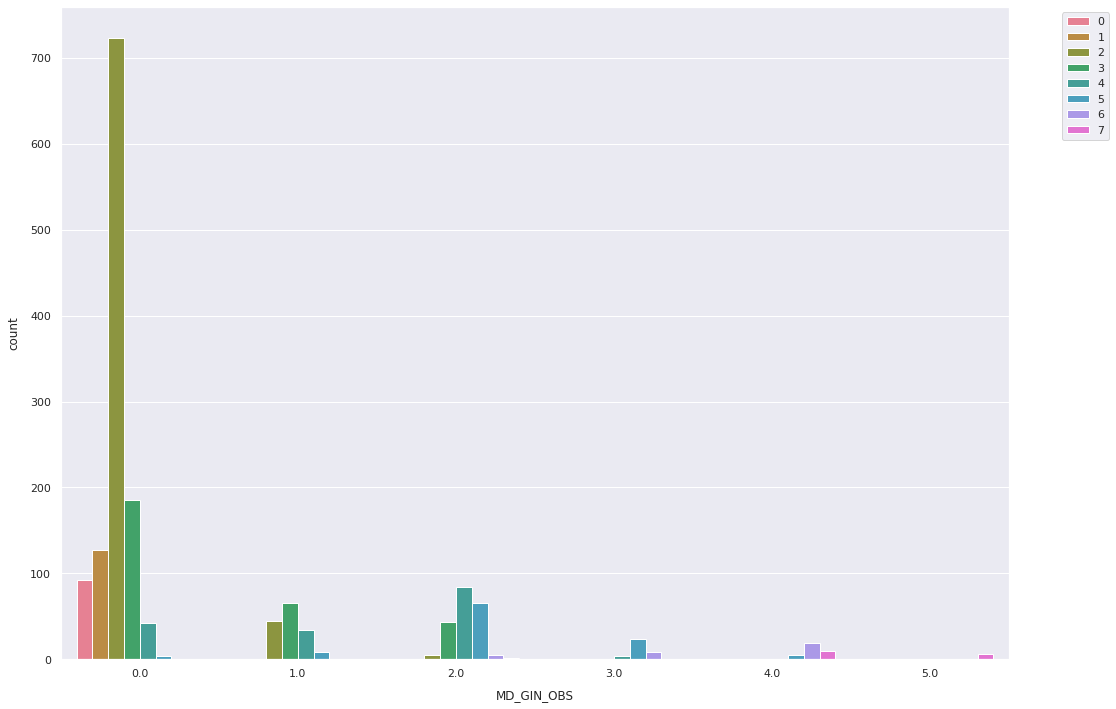

In [ ]:
ax=sns.countplot(data=df,x='MD_GIN_OBS', hue='POP_EST', palette='husl');
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

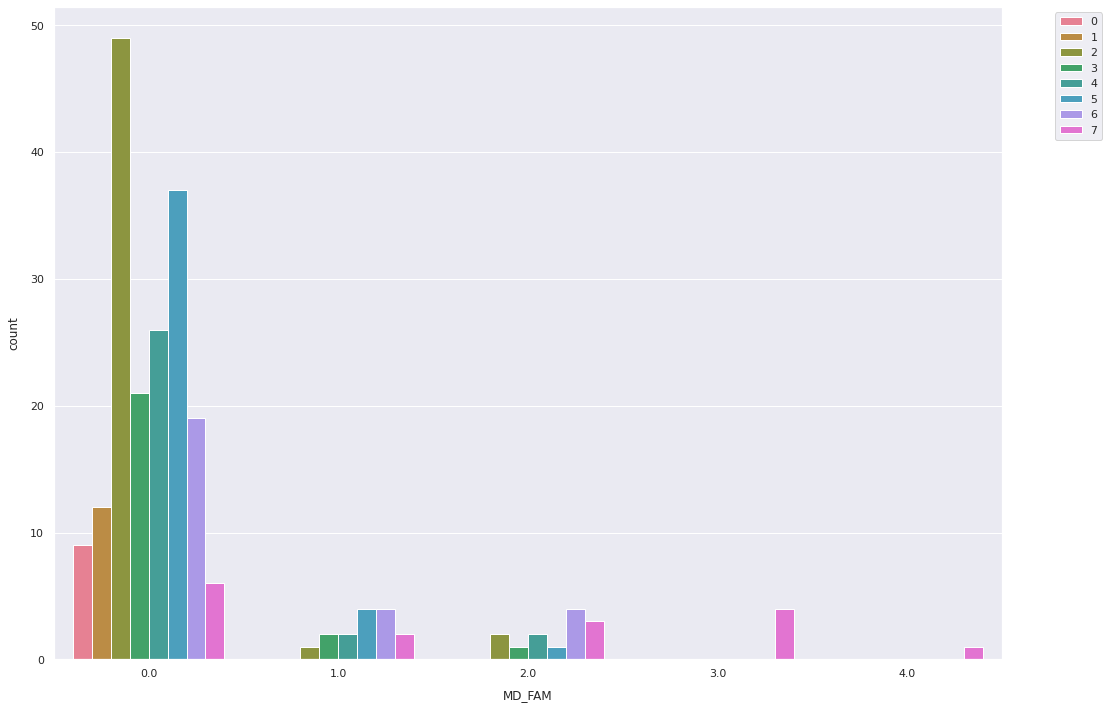

In [ ]:
# EXISTEM POUCOS MEDICOS DE FAMILIA
ax=sns.countplot(data=df,x='MD_FAM', hue='POP_EST', palette='husl');
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


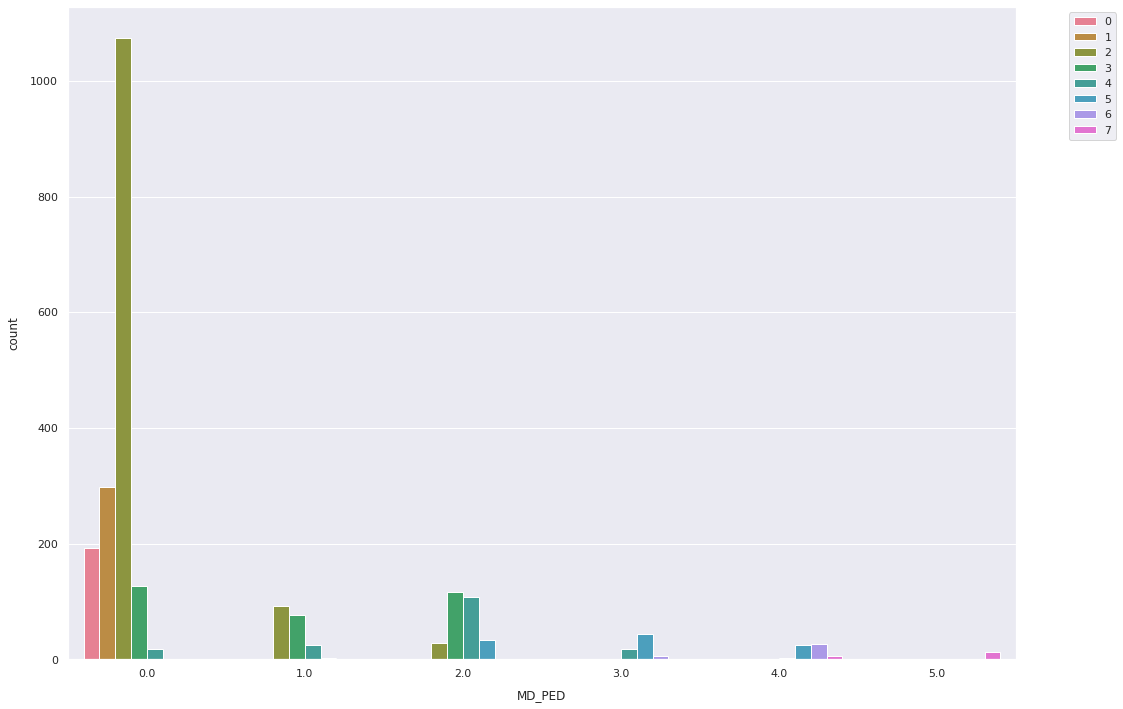

In [ ]:
ax=sns.countplot(data=df,x='MD_PED', hue='POP_EST', palette='husl');
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

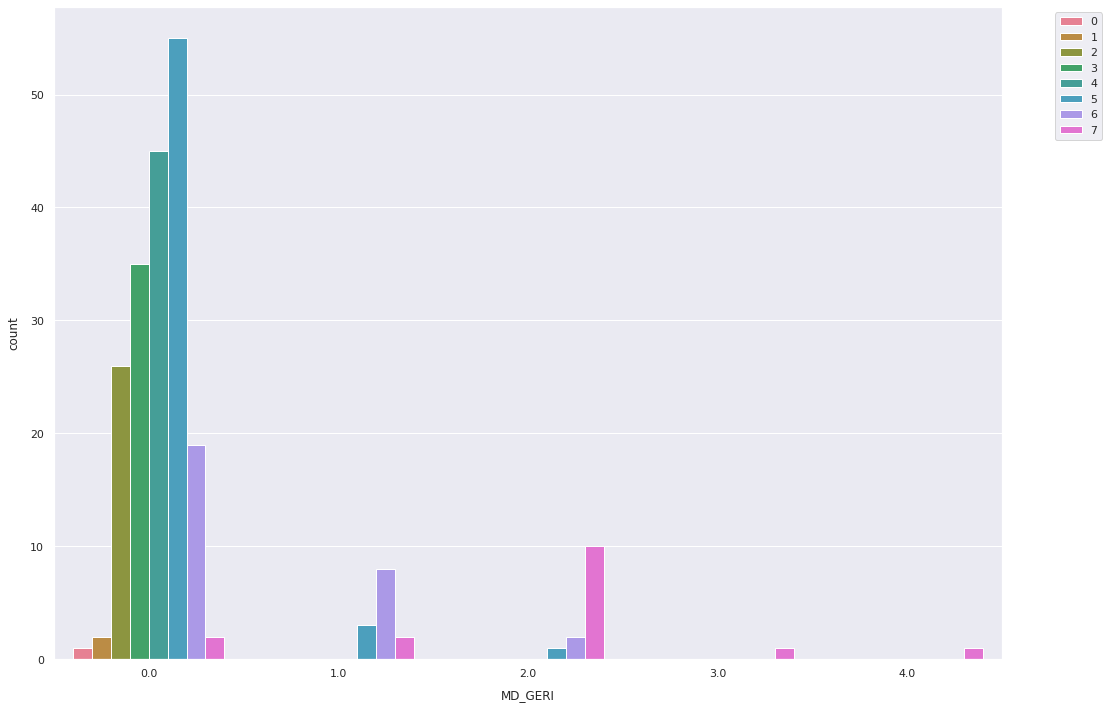

In [ ]:
ax=sns.countplot(data=df,x='MD_GERI', hue='POP_EST', palette='husl');
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

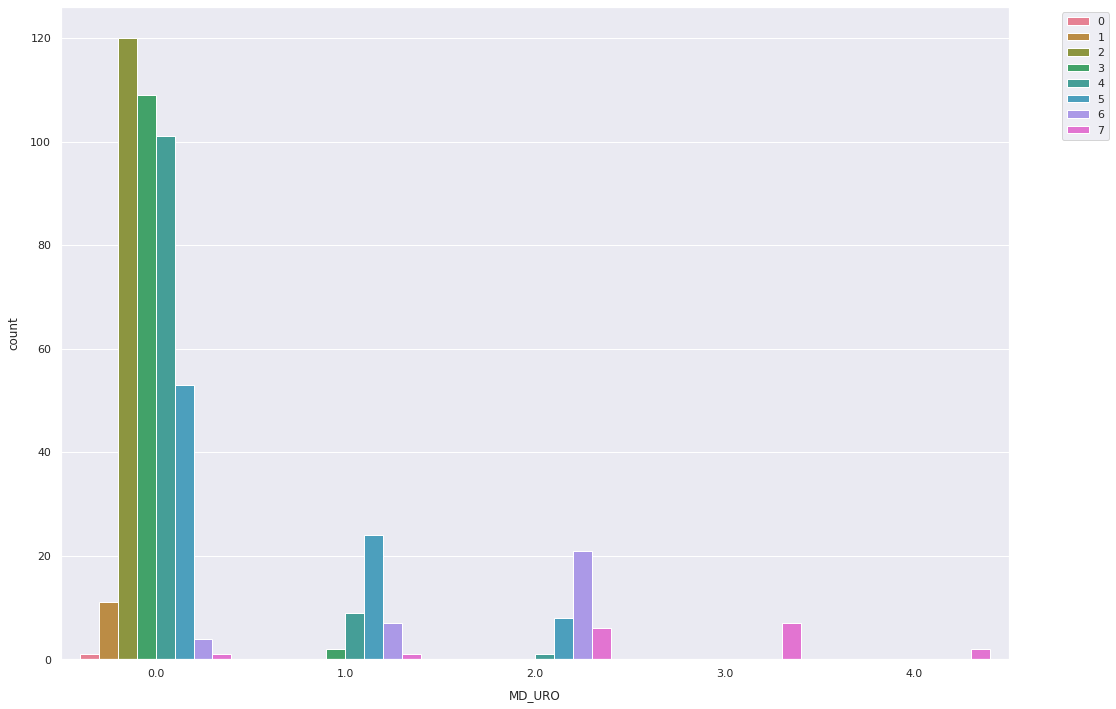

In [ ]:
ax=sns.countplot(data=df,x='MD_URO', hue='POP_EST', palette='husl');
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

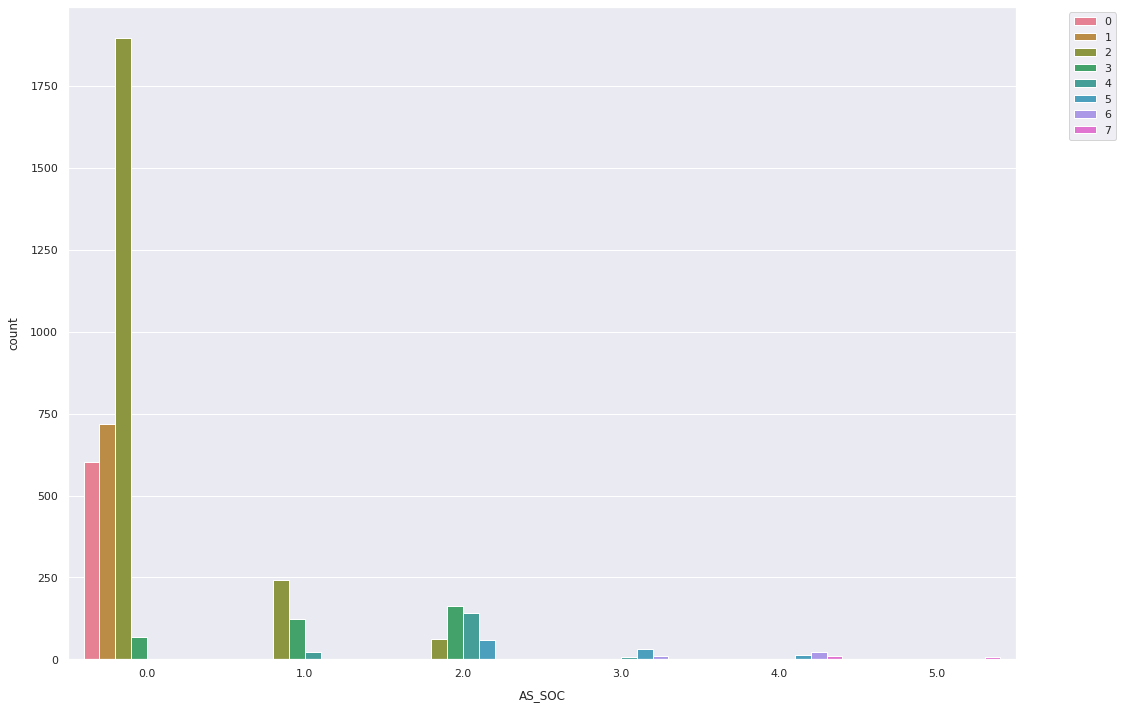

In [ ]:
ax=sns.countplot(data=df,x='AS_SOC', hue='POP_EST', palette='husl');
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

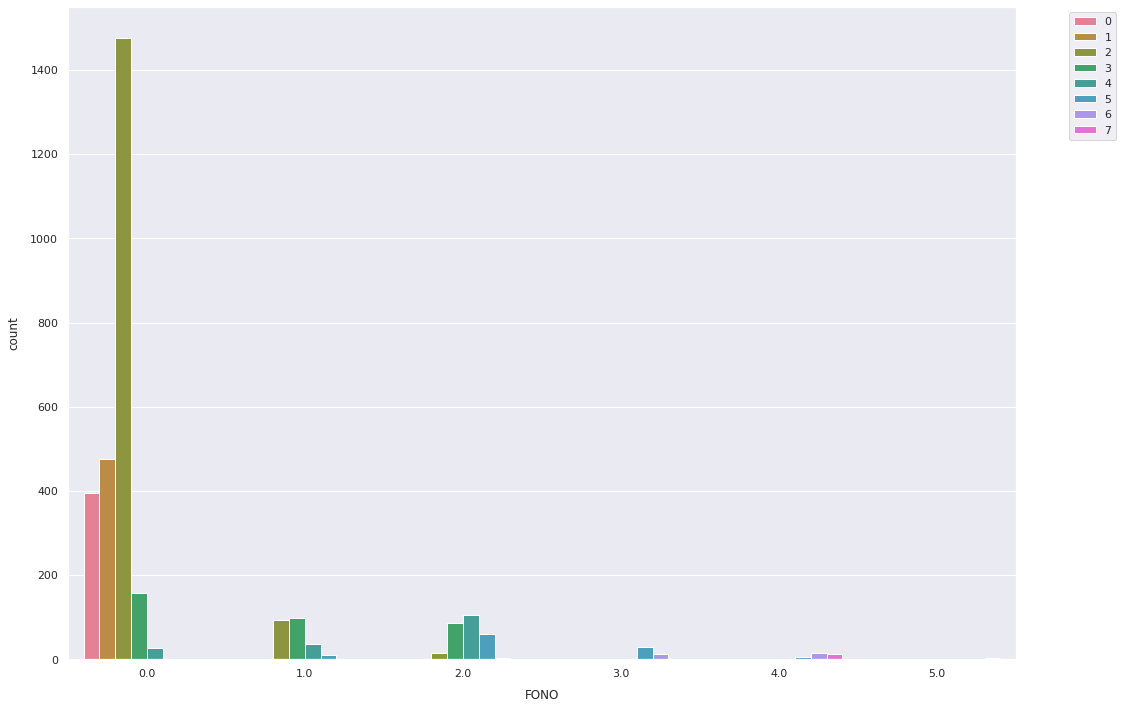

In [ ]:
ax=sns.countplot(data=df,x='FONO', hue='POP_EST', palette='husl');
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

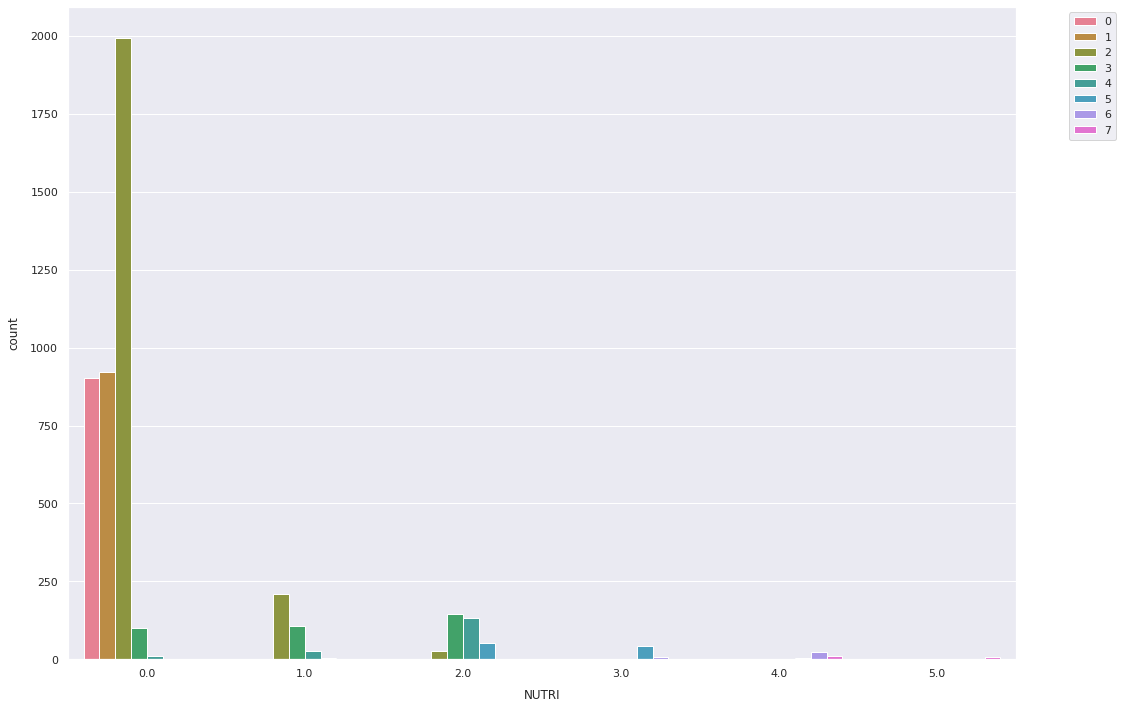

In [ ]:
ax=sns.countplot(data=df,x='NUTRI', hue='POP_EST', palette='husl');
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

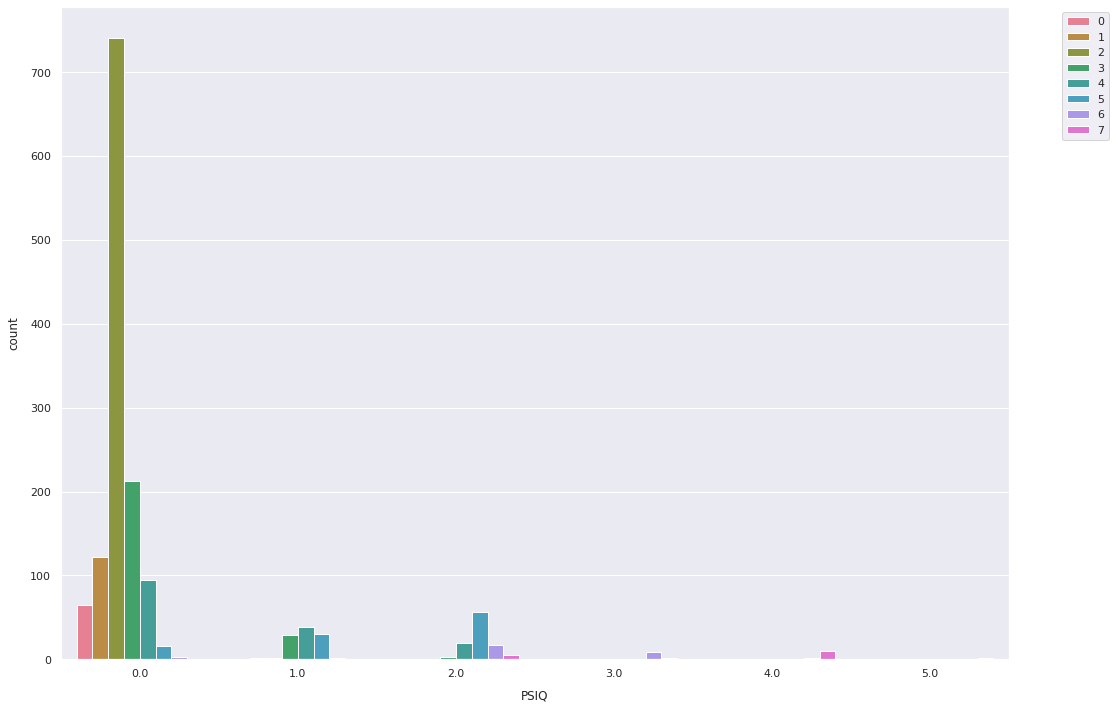

In [ ]:
ax=sns.countplot(data=df,x='PSIQ', hue='POP_EST', palette='husl');
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

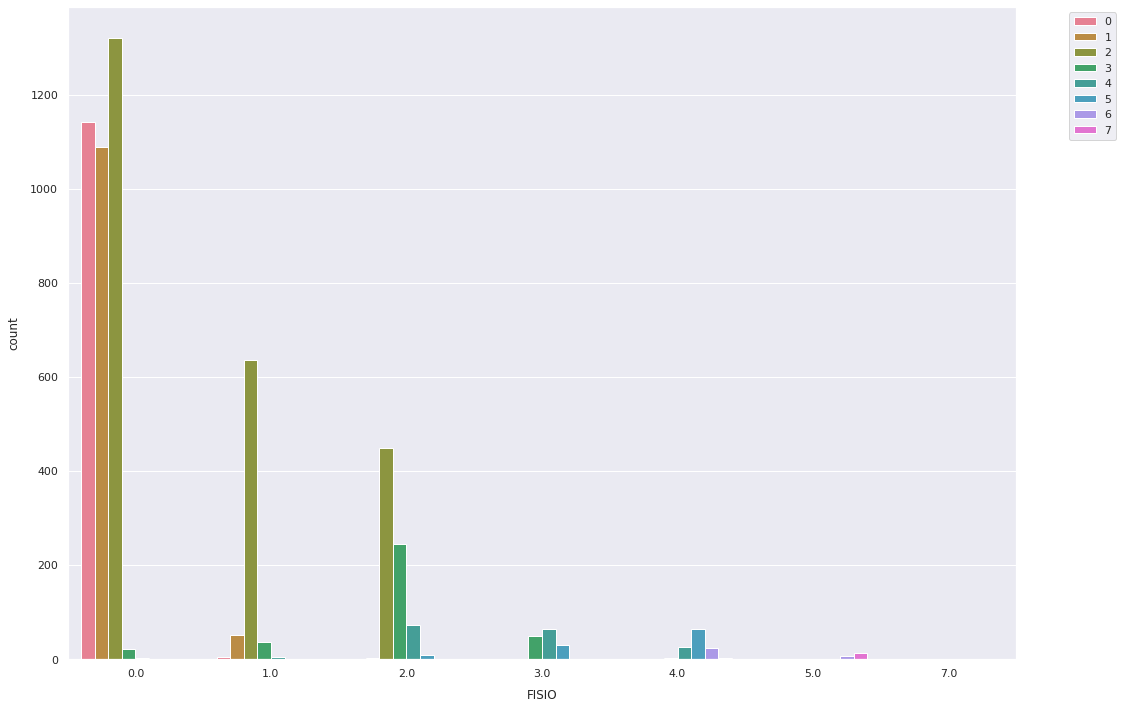

In [ ]:
ax=sns.countplot(data=df,x='FISIO', hue='POP_EST', palette='husl');
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

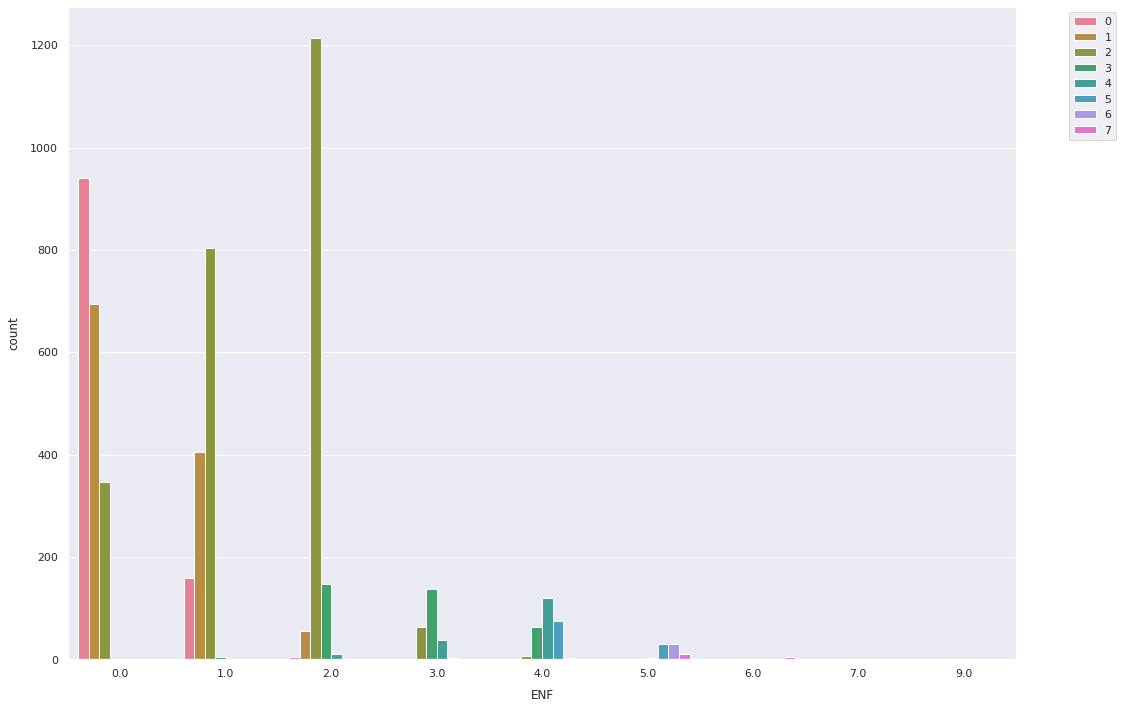

In [ ]:
ax=sns.countplot(data=df,x='ENF', hue='POP_EST', palette='husl');
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

A partir da Analise Exploratória, decidiu-se verificar a relação dos profissionais da saúde disponiveis nos municipios com a porcentagem de de recém nascidos com algum tipo de anomalia. Para isso foi adicionado uma nova tabela do Data SUS com os dados sobre nascimento nos municipios.

In [ ]:
df2 = pd.read_csv('/content/A011613189_28_143_208.csv', sep= ';', encoding= 'latin-1')

In [ ]:
df

,CD_MUN,MUN,AR_TER_km2,POP_EST,DENS_DEM,ESC,IDHM,MORT_INF,PIB_P_CAP,MD_CIR_G,MD_CLIN,MD_GIN_OBS,MD_FAM,MD_PED,MD_GERI,MD_URO,AS_SOC,ENF,FISIO,FONO,NUTRI,ODONTO,PSICO,PSIQ,POSTO,CS_UBS,POLICL,HOSP_GER,HOSP_ESP,PRT_SOC,PRT_ESP
0,1100015,Alta Floresta D'Oeste,7067.13,2,3.45,95.70,641.00,8.17,21552.47,0.00,11.00,NaN,NaN,NaN,NaN,NaN,0.00,2.00,0.00,NaN,0.00,1.00,0.00,0.00,6.00,4.00,0.00,2.00,0.00,0.00,0.00
1,1100023,Ariquemes,4426.57,4,20.41,97.20,702.00,10.41,23206.36,1.00,96.00,2.00,NaN,2.00,NaN,0.00,1.00,4.00,2.00,0.00,1.00,2.00,2.00,0.00,0.00,13.00,1.00,10.00,1.00,0.00,0.00
2,1100031,Cabixi,1314.35,1,4.80,98.10,0.65,25.00,25837.12,NaN,6.00,NaN,NaN,NaN,NaN,NaN,0.00,1.00,0.00,0.00,0.00,0.00,0.00,NaN,0.00,2.00,0.00,0.00,0.00,0.00,0.00
3,1100049,Cacoal,3793.00,3,20.72,97.60,718.00,5.09,25708.96,1.00,109.00,2.00,0.00,2.00,NaN,0.00,2.00,4.00,3.00,2.00,2.00,4.00,2.00,1.00,1.00,11.00,5.00,8.00,0.00,1.00,0.00
4,1100056,Cerejeiras,2783.30,2,6.12,98.50,692.00,16.88,28714.35,NaN,10.00,NaN,NaN,0.00,NaN,NaN,0.00,2.00,0.00,NaN,NaN,1.00,0.00,NaN,2.00,4.00,0.00,1.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,5222005,Vianópolis,954284.00,2,13.15,98.60,712.00,5.10,32025.46,NaN,5.00,0.00,NaN,NaN,NaN,NaN,NaN,1.00,0.00,0.00,0.00,0.00,0.00,NaN,0.00,5.00,0.00,1.00,0.00,0.00,0.00
5566,5222054,Vicentinópolis,737255.00,1,10.00,99.10,684.00,26.79,37435.76,NaN,3.00,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,0.00,0.00,NaN,0.00,5.00,0.00,1.00,0.00,0.00,0.00
5567,5222203,Vila Boa,1060.17,1,4.47,96.00,647.00,20.00,17160.33,NaN,1.00,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,0.00,NaN,0.00,NaN,0.00,2.00,0.00,1.00,0.00,0.00,0.00
5568,5222302,Vila Propício,2181.58,1,2.36,96.90,634.00,56.34,28444.32,NaN,1.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,0.00,NaN,0.00,NaN,NaN,NaN,0.00,2.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
# colocando os nomes dos municipios em maiusculo e retirando todos os caracteres especiais
df['MUN'] = df['MUN'].str.upper()
df['MUN'] = df['MUN'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
df

,CD_MUN,MUN,AR_TER_km2,POP_EST,DENS_DEM,ESC,IDHM,MORT_INF,PIB_P_CAP,MD_CIR_G,MD_CLIN,MD_GIN_OBS,MD_FAM,MD_PED,MD_GERI,MD_URO,AS_SOC,ENF,FISIO,FONO,NUTRI,ODONTO,PSICO,PSIQ,POSTO,CS_UBS,POLICL,HOSP_GER,HOSP_ESP,PRT_SOC,PRT_ESP
0,1100015,ALTA FLORESTA D'OESTE,7067.13,2,3.45,95.70,641.00,8.17,21552.47,0.00,11.00,NaN,NaN,NaN,NaN,NaN,0.00,2.00,0.00,NaN,0.00,1.00,0.00,0.00,6.00,4.00,0.00,2.00,0.00,0.00,0.00
1,1100023,ARIQUEMES,4426.57,4,20.41,97.20,702.00,10.41,23206.36,1.00,96.00,2.00,NaN,2.00,NaN,0.00,1.00,4.00,2.00,0.00,1.00,2.00,2.00,0.00,0.00,13.00,1.00,10.00,1.00,0.00,0.00
2,1100031,CABIXI,1314.35,1,4.80,98.10,0.65,25.00,25837.12,NaN,6.00,NaN,NaN,NaN,NaN,NaN,0.00,1.00,0.00,0.00,0.00,0.00,0.00,NaN,0.00,2.00,0.00,0.00,0.00,0.00,0.00
3,1100049,CACOAL,3793.00,3,20.72,97.60,718.00,5.09,25708.96,1.00,109.00,2.00,0.00,2.00,NaN,0.00,2.00,4.00,3.00,2.00,2.00,4.00,2.00,1.00,1.00,11.00,5.00,8.00,0.00,1.00,0.00
4,1100056,CEREJEIRAS,2783.30,2,6.12,98.50,692.00,16.88,28714.35,NaN,10.00,NaN,NaN,0.00,NaN,NaN,0.00,2.00,0.00,NaN,NaN,1.00,0.00,NaN,2.00,4.00,0.00,1.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,5222005,VIANOPOLIS,954284.00,2,13.15,98.60,712.00,5.10,32025.46,NaN,5.00,0.00,NaN,NaN,NaN,NaN,NaN,1.00,0.00,0.00,0.00,0.00,0.00,NaN,0.00,5.00,0.00,1.00,0.00,0.00,0.00
5566,5222054,VICENTINOPOLIS,737255.00,1,10.00,99.10,684.00,26.79,37435.76,NaN,3.00,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,0.00,0.00,NaN,0.00,5.00,0.00,1.00,0.00,0.00,0.00
5567,5222203,VILA BOA,1060.17,1,4.47,96.00,647.00,20.00,17160.33,NaN,1.00,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,0.00,NaN,0.00,NaN,0.00,2.00,0.00,1.00,0.00,0.00,0.00
5568,5222302,VILA PROPICIO,2181.58,1,2.36,96.90,634.00,56.34,28444.32,NaN,1.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,0.00,NaN,0.00,NaN,NaN,NaN,0.00,2.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
# retirando os valores numericos com codigos das cidades e mantendo somente os nomes
df2['MUN'] = df2['MUN'].str.extract('(\D+)', expand=False).str.strip()
df2

,MUN,Nao,Total
0,ALTA FLORESTA D'OESTE,331,333
1,ARIQUEMES,1483,1507
2,CABIXI,68,69
3,CACOAL,1314,1325
4,CEREJEIRAS,268,269
...,...,...,...
5565,VIANOPOLIS,170,172
5566,VICENTINOPOLIS,138,139
5567,VILA BOA,51,51
5568,VILA PROPICIO,53,53


In [ ]:
# juntando os dois dfs para incluir as colunas de total de nascidos vivos e nascidos vivos sem anomalias
df = pd.merge(df, df2, on="MUN", how= 'left')
df

,CD_MUN,MUN,AR_TER_km2,POP_EST,DENS_DEM,ESC,IDHM,MORT_INF,PIB_P_CAP,MD_CIR_G,MD_CLIN,MD_GIN_OBS,MD_FAM,MD_PED,MD_GERI,MD_URO,AS_SOC,ENF,FISIO,FONO,NUTRI,ODONTO,PSICO,PSIQ,POSTO,CS_UBS,POLICL,HOSP_GER,HOSP_ESP,PRT_SOC,PRT_ESP,Nao,Total
0,1100015,ALTA FLORESTA D'OESTE,7067.13,2,3.45,95.70,641.00,8.17,21552.47,0.00,11.00,NaN,NaN,NaN,NaN,NaN,0.00,2.00,0.00,NaN,0.00,1.00,0.00,0.00,6.00,4.00,0.00,2.00,0.00,0.00,0.00,331.00,333.00
1,1100023,ARIQUEMES,4426.57,4,20.41,97.20,702.00,10.41,23206.36,1.00,96.00,2.00,NaN,2.00,NaN,0.00,1.00,4.00,2.00,0.00,1.00,2.00,2.00,0.00,0.00,13.00,1.00,10.00,1.00,0.00,0.00,1483.00,1507.00
2,1100031,CABIXI,1314.35,1,4.80,98.10,0.65,25.00,25837.12,NaN,6.00,NaN,NaN,NaN,NaN,NaN,0.00,1.00,0.00,0.00,0.00,0.00,0.00,NaN,0.00,2.00,0.00,0.00,0.00,0.00,0.00,68.00,69.00
3,1100049,CACOAL,3793.00,3,20.72,97.60,718.00,5.09,25708.96,1.00,109.00,2.00,0.00,2.00,NaN,0.00,2.00,4.00,3.00,2.00,2.00,4.00,2.00,1.00,1.00,11.00,5.00,8.00,0.00,1.00,0.00,1314.00,1325.00
4,1100056,CEREJEIRAS,2783.30,2,6.12,98.50,692.00,16.88,28714.35,NaN,10.00,NaN,NaN,0.00,NaN,NaN,0.00,2.00,0.00,NaN,NaN,1.00,0.00,NaN,2.00,4.00,0.00,1.00,0.00,0.00,0.00,268.00,269.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6231,5222005,VIANOPOLIS,954284.00,2,13.15,98.60,712.00,5.10,32025.46,NaN,5.00,0.00,NaN,NaN,NaN,NaN,NaN,1.00,0.00,0.00,0.00,0.00,0.00,NaN,0.00,5.00,0.00,1.00,0.00,0.00,0.00,170.00,172.00
6232,5222054,VICENTINOPOLIS,737255.00,1,10.00,99.10,684.00,26.79,37435.76,NaN,3.00,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,0.00,0.00,NaN,0.00,5.00,0.00,1.00,0.00,0.00,0.00,138.00,139.00
6233,5222203,VILA BOA,1060.17,1,4.47,96.00,647.00,20.00,17160.33,NaN,1.00,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,0.00,NaN,0.00,NaN,0.00,2.00,0.00,1.00,0.00,0.00,0.00,51.00,51.00
6234,5222302,VILA PROPICIO,2181.58,1,2.36,96.90,634.00,56.34,28444.32,NaN,1.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,0.00,NaN,0.00,NaN,NaN,NaN,0.00,2.00,0.00,0.00,0.00,0.00,0.00,53.00,53.00


In [ ]:
df = df.rename(columns={'Nao': 'SEM_ANOM', 'Total': 'NASC'})

In [ ]:
# Calcula a porcentagem da coluna 'B' em relação à soma de todas as entradas na coluna 'B'
df['ANOM'] = 100- (df['SEM_ANOM']*100 / df['NASC'])

Foi criada uma nova coluna ANOM, que significa crianças que nsceram com algum tipo de anomalia, e elas foram calculadas com o total de nascimentos - a quatidade de crianças sem anomalia sendo igual nascidos com anomalia em porcentagem.

In [ ]:
df

,CD_MUN,MUN,AR_TER_km2,POP_EST,DENS_DEM,ESC,IDHM,MORT_INF,PIB_P_CAP,MD_CIR_G,MD_CLIN,MD_GIN_OBS,MD_FAM,MD_PED,MD_GERI,MD_URO,AS_SOC,ENF,FISIO,FONO,NUTRI,ODONTO,PSICO,PSIQ,POSTO,CS_UBS,POLICL,HOSP_GER,HOSP_ESP,PRT_SOC,PRT_ESP,SEM_ANOM,NASC,ANOM
0,1100015,ALTA FLORESTA D'OESTE,7067.13,2,3.45,95.70,641.00,8.17,21552.47,0.00,11.00,NaN,NaN,NaN,NaN,NaN,0.00,2.00,0.00,NaN,0.00,1.00,0.00,0.00,6.00,4.00,0.00,2.00,0.00,0.00,0.00,331.00,333.00,0.60
1,1100023,ARIQUEMES,4426.57,4,20.41,97.20,702.00,10.41,23206.36,1.00,96.00,2.00,NaN,2.00,NaN,0.00,1.00,4.00,2.00,0.00,1.00,2.00,2.00,0.00,0.00,13.00,1.00,10.00,1.00,0.00,0.00,1483.00,1507.00,1.59
2,1100031,CABIXI,1314.35,1,4.80,98.10,0.65,25.00,25837.12,NaN,6.00,NaN,NaN,NaN,NaN,NaN,0.00,1.00,0.00,0.00,0.00,0.00,0.00,NaN,0.00,2.00,0.00,0.00,0.00,0.00,0.00,68.00,69.00,1.45
3,1100049,CACOAL,3793.00,3,20.72,97.60,718.00,5.09,25708.96,1.00,109.00,2.00,0.00,2.00,NaN,0.00,2.00,4.00,3.00,2.00,2.00,4.00,2.00,1.00,1.00,11.00,5.00,8.00,0.00,1.00,0.00,1314.00,1325.00,0.83
4,1100056,CEREJEIRAS,2783.30,2,6.12,98.50,692.00,16.88,28714.35,NaN,10.00,NaN,NaN,0.00,NaN,NaN,0.00,2.00,0.00,NaN,NaN,1.00,0.00,NaN,2.00,4.00,0.00,1.00,0.00,0.00,0.00,268.00,269.00,0.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6231,5222005,VIANOPOLIS,954284.00,2,13.15,98.60,712.00,5.10,32025.46,NaN,5.00,0.00,NaN,NaN,NaN,NaN,NaN,1.00,0.00,0.00,0.00,0.00,0.00,NaN,0.00,5.00,0.00,1.00,0.00,0.00,0.00,170.00,172.00,1.16
6232,5222054,VICENTINOPOLIS,737255.00,1,10.00,99.10,684.00,26.79,37435.76,NaN,3.00,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,0.00,0.00,NaN,0.00,5.00,0.00,1.00,0.00,0.00,0.00,138.00,139.00,0.72
6233,5222203,VILA BOA,1060.17,1,4.47,96.00,647.00,20.00,17160.33,NaN,1.00,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,0.00,NaN,0.00,NaN,0.00,2.00,0.00,1.00,0.00,0.00,0.00,51.00,51.00,0.00
6234,5222302,VILA PROPICIO,2181.58,1,2.36,96.90,634.00,56.34,28444.32,NaN,1.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,0.00,NaN,0.00,NaN,NaN,NaN,0.00,2.00,0.00,0.00,0.00,0.00,0.00,53.00,53.00,0.00


In [ ]:
df.describe()

,CD_MUN,AR_TER_km2,POP_EST,DENS_DEM,ESC,IDHM,MORT_INF,PIB_P_CAP,MD_CIR_G,MD_CLIN,MD_GIN_OBS,MD_FAM,MD_PED,MD_GERI,MD_URO,AS_SOC,ENF,FISIO,FONO,NUTRI,ODONTO,PSICO,PSIQ,POSTO,CS_UBS,POLICL,HOSP_GER,HOSP_ESP,PRT_SOC,PRT_ESP,SEM_ANOM,NASC,ANOM
count,6236.00,6236.00,6236.00,6236.00,6236.00,6236.00,6236.00,6236.00,1052.00,6236.00,1793.00,244.00,2625.00,235.00,528.00,4745.00,6009.00,6020.00,3511.00,5304.00,4652.00,5741.00,1647.00,6236.00,6236.00,6236.00,6236.00,6236.00,6236.00,6236.00,6221.00,6221.00,6221.00
mean,3244090.83,241919.84,1.56,106.58,97.14,591.63,19.01,23410.90,0.45,25.09,0.50,0.25,0.53,0.22,0.30,0.38,1.20,0.62,0.33,0.30,0.74,0.52,0.25,1.59,7.10,1.83,0.96,0.17,0.05,0.01,474.25,487.16,2.60
std,982942.81,257644.14,1.19,552.28,2.70,209.65,10.85,25183.07,0.89,179.43,0.97,0.67,1.02,0.61,0.70,0.81,1.21,1.02,0.79,0.74,1.12,0.97,0.68,3.09,12.99,14.33,3.29,1.88,0.35,0.17,2493.68,2557.89,7.61
min,1100015.00,26.10,0.00,0.13,51.80,0.45,1.96,4788.18,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,2.00,0.00
25%,2510907.00,3770.96,1.00,11.86,96.60,579.00,11.19,9806.15,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,60.00,62.00,0.00
50%,3143128.50,170835.50,2.00,24.69,97.60,648.00,18.03,17242.76,0.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,0.00,1.00,0.00,0.00,0.00,139.00,143.00,1.08
75%,4118414.25,374527.25,2.00,52.72,98.50,712.00,24.36,28651.74,0.00,10.00,1.00,0.00,1.00,0.00,0.00,0.00,2.00,1.00,0.00,0.00,1.00,1.00,0.00,2.00,8.00,1.00,1.00,0.00,0.00,0.00,328.00,336.00,2.15
max,5300108.00,999517.00,7.00,13024.56,100.00,862.00,181.82,583171.85,5.00,9833.00,5.00,4.00,5.00,4.00,4.00,5.00,9.00,7.00,5.00,5.00,5.00,5.00,5.00,78.00,522.00,581.00,157.00,69.00,15.00,6.00,144007.00,147133.00,96.00


In [ ]:
# Deletando os outliers

def drop_outliers(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   not_outliers = df[~((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   outliers_dropped = not_outliers.dropna()
   return outliers_dropped

df = drop_outliers(df)
df

In [ ]:
df=df.fillna(0)
df['ANOM'] = pd.cut(df['ANOM'], bins=[1.5, 100], labels=False)
df=df.fillna(0)

In [ ]:
df['ANOM']

0      0.00
1      0.00
2      0.00
3      0.00
4      0.00
       ... 
6231   0.00
6232   0.00
6233   0.00
6234   0.00
6235   0.00
Name: ANOM, Length: 6236, dtype: float64

Foi criado uma classificação das crianças com anomalia de 0, 1, 2, 5, e 100, sendo os valores escolhidos por 75% dos valores estavam entre 0 e 2, porém existiam valores acima disso.

In [ ]:
df=df.drop(['SEM_ANOM', 'NASC'], axis=1)

### Modelos



Para descobrirmos quais são as possiveis variavéis que podem estar interferindo na quantidade de nascidos vivos com anomalia, utilizaremos modelos de predição por aprendizado de máquina. 
Esse é um problema de classificação e como análise inicial utilizaremos modelos baseeados em construção de árvores de decisão: Decision Tree e Random Forest.


In [ ]:
import sklearn

# importando as bibliotecas para o cross-validation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [ ]:
y=df['ANOM'] 
x=df.drop(columns=['ANOM', 'CD_MUN', 'MUN'])

In [ ]:
# separando os datasets para treino do modelo e para o teste
train, test = train_test_split(df, test_size= 0.1, random_state= 42)
kf=KFold(n_splits=10)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.1, random_state= 42, stratify= y)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Foi decidido separar o dataset em 10 partes para que cada vez que o  algoritmo rodar ele tente acertar em 10%.

In [ ]:
reg = LinearRegression().fit(x, y)
reg.score(x, y)
reg.coef_
reg.intercept_
reg.predict(x_test)


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.67144332, 0.56443316, 0.70737793, 0.67715363, 0.67274336,
       0.72931338, 0.68038124, 0.67410798, 0.6911353 , 0.68155704,
       0.66990997, 0.60428011, 0.67415061, 0.5505616 , 0.57771895,
       0.68253365, 0.67324748, 0.67765307, 0.59453463, 0.72608362,
       0.70398424, 0.32317287, 0.67782854, 0.67011952, 0.67566226,
       0.73483726, 0.62383143, 0.57110935, 0.69416916, 0.6185225 ,
       0.67353235, 0.61075919, 0.61838219, 0.67123741, 0.70227847,
       0.71521628, 0.69882579, 0.69066517, 0.69720844, 0.63913964,
       1.05035201, 0.67744193, 0.71756445, 0.61970231, 0.70586496,
       0.68281158, 0.67095353, 0.69022197, 0.5641335 , 0.48847013,
       0.67564916, 0.68345091, 1.33715382, 0.72437205, 0.66893977,
       0.67176309, 0.66993278, 0.67264515, 0.55112302, 0.71665805,
       0.67396569, 0.5305138 , 0.67698374, 0.71986714, 0.59108187,
       0.55399142, 0.68745678, 0.6720886 , 0.69121268, 0.70445819,
       0.69120428, 0.67273717, 0.64567841, 0.67502227, 0.71745

In [ ]:
pipe = Pipeline([('model', reg)])

scores = []
i = 1
for train_set, test_set in kf.split(x):
    pipe.fit(x.loc[train_set], y[train_set])
    sco = pipe.score(x.loc[test_set], y[test_set])
    scores.append(sco)
    print("iteration ", i)
    i += 1

iteration  1
iteration  2
iteration  3
iteration  4
iteration  5
iteration  6
iteration  7
iteration  8
iteration  9
iteration  10


In [ ]:
lm = LinearRegression()
scores = cross_val_score(lm, x_train, y_train, scoring='r2', cv=5)
scores

array([-0.01342037, -0.00463279, -0.00680475, -0.00827584,  0.00098992])

In [ ]:
print('Scores: ', np.array(scores))

print('Mean: ', np.array(scores).mean())

print('SD: ', np.array(scores).std())

Scores:  [-0.01342037 -0.00463279 -0.00680475 -0.00827584  0.00098992]
Mean:  -0.006428767059735297
SD:  0.004705273276833845


os valores indicados nos scores apresentam para cada uma das 10 reamostragens realizadas, a média desses scores e o desvio padrão. A média dos scores (-0.004) indica que o modelo teve um desempenho abaixo da média. Já o desvio padrão (0.009) indica que os scores variam bastante em relação à média.